# **SpaceX  Falcon 9 First Stage Landing Prediction**

In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.

## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering

In [1]:
import pandas as pd

In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df=pd.read_csv(URL)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.


In [3]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

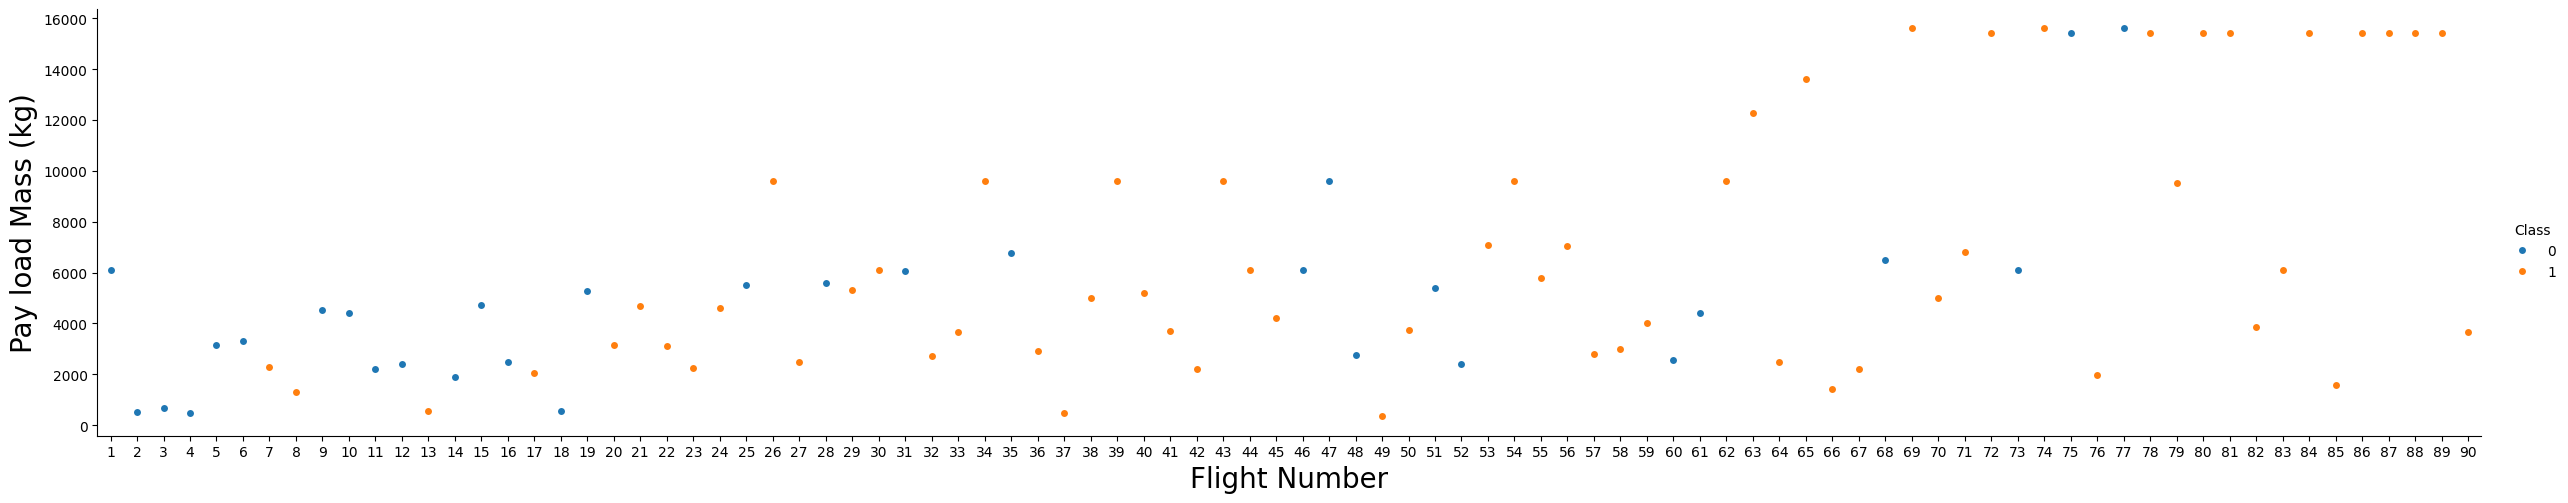

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

### TASK 1: Visualize the relationship between Flight Number and Launch Site

Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


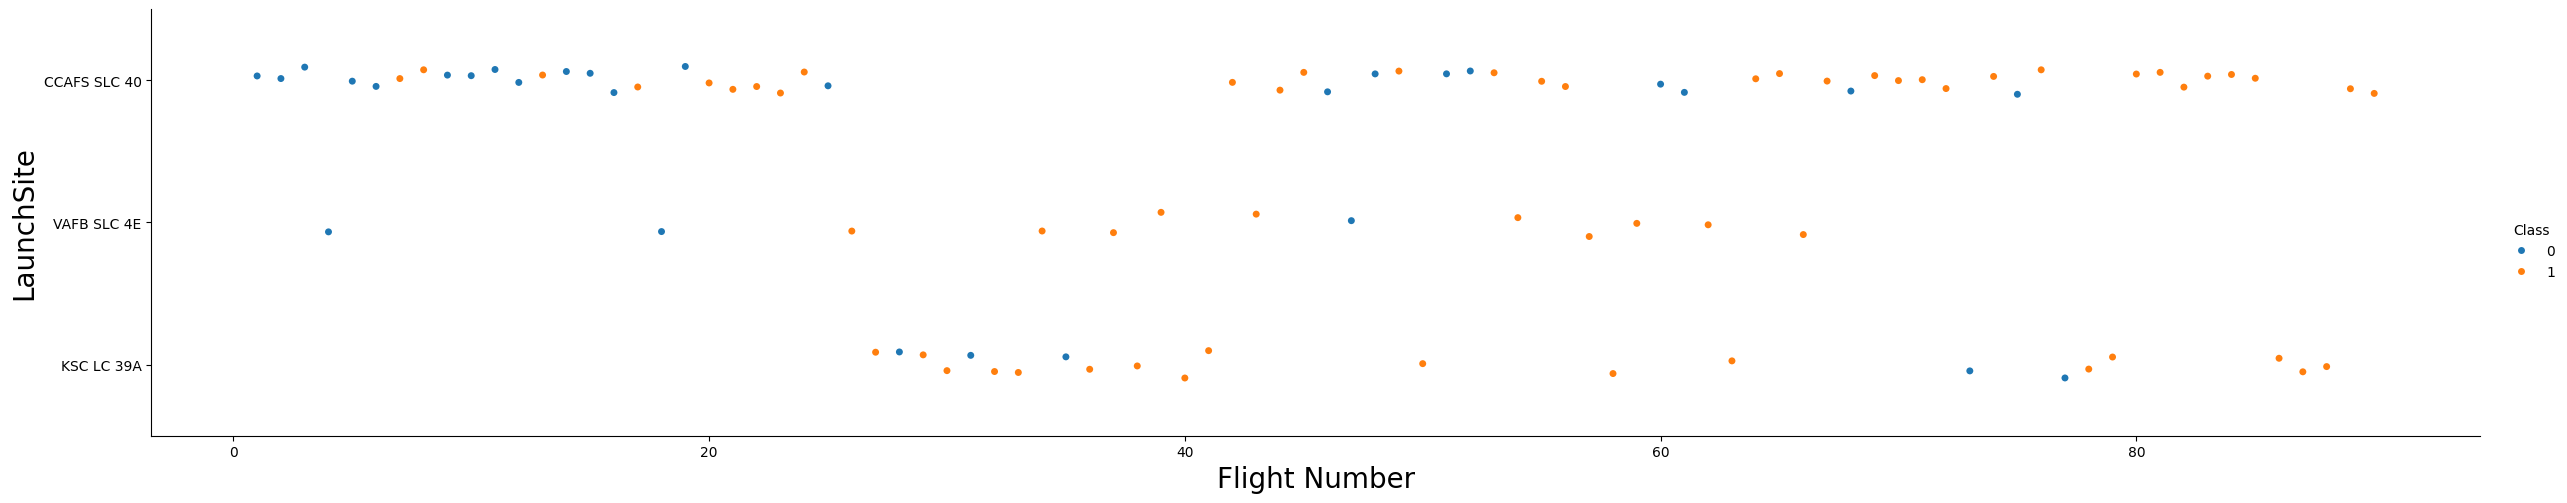

In [5]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

### TASK 2: Visualize the relationship between Payload Mass and Launch Site

We also want to observe if there is any relationship between launch sites and their payload mass.

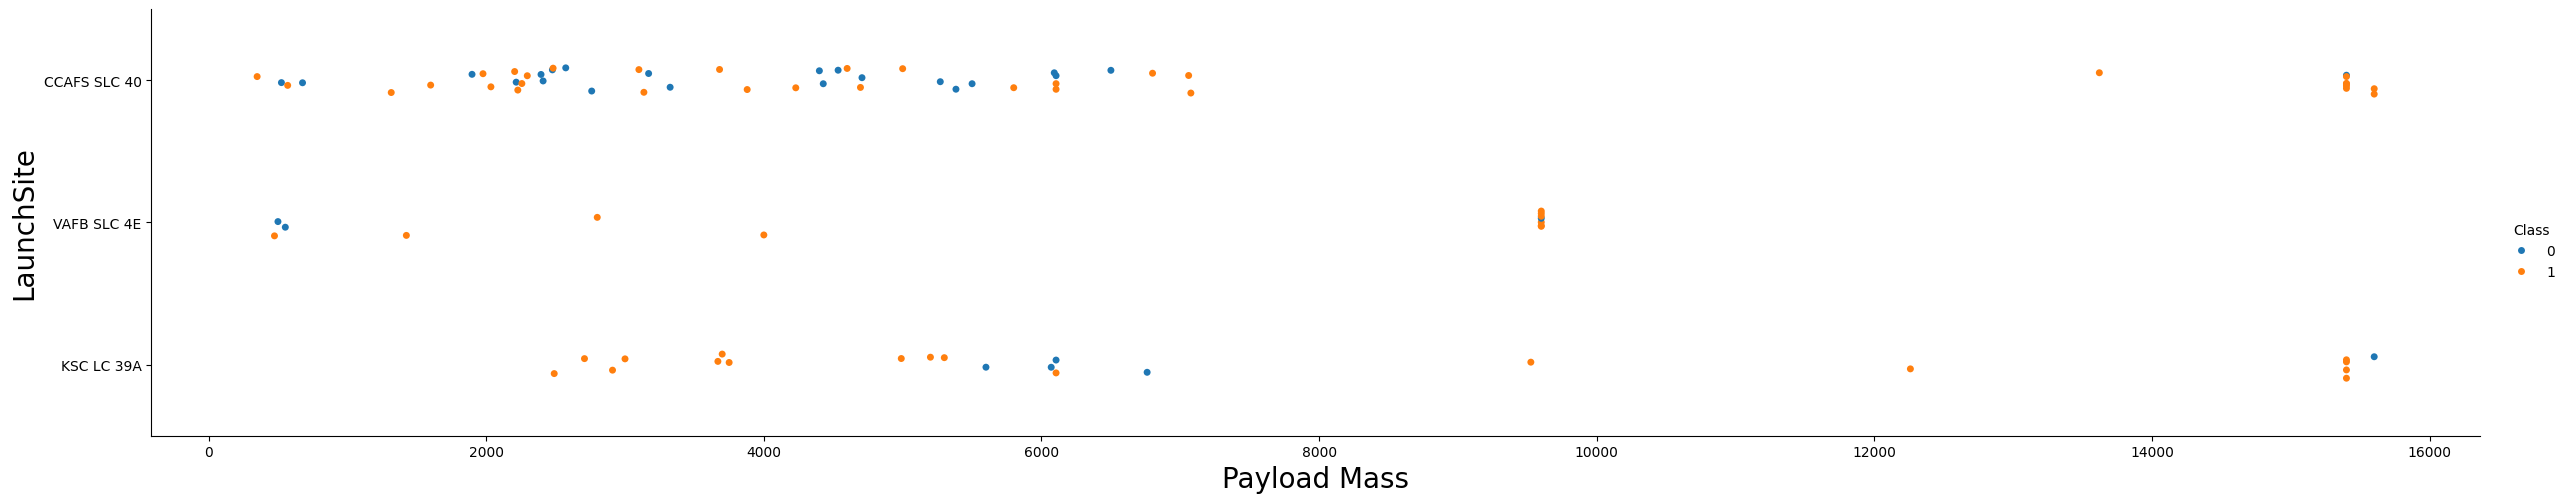

In [6]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Payload Mass",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

Now if you observe Payload Mass Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).

### TASK  3: Visualize the relationship between success rate of each orbit type

Next, we want to visually check if there are any relationship between success rate and orbit type.
Let's create a `bar chart` for the sucess rate of each orbit

In [7]:
# HINT use groupby method on Orbit column and get the mean of Class column
barchart = df.groupby('Orbit')['Class'].mean().reset_index()
barchart

,Orbit,Class
0,ES-L1,1.000000
1,GEO,1.000000
2,GTO,0.518519
3,HEO,1.000000
4,ISS,0.619048
5,LEO,0.714286
6,MEO,0.666667
7,PO,0.666667
8,SO,0.000000
9,SSO,1.000000


Text(0.5, 0, 'Orbit')

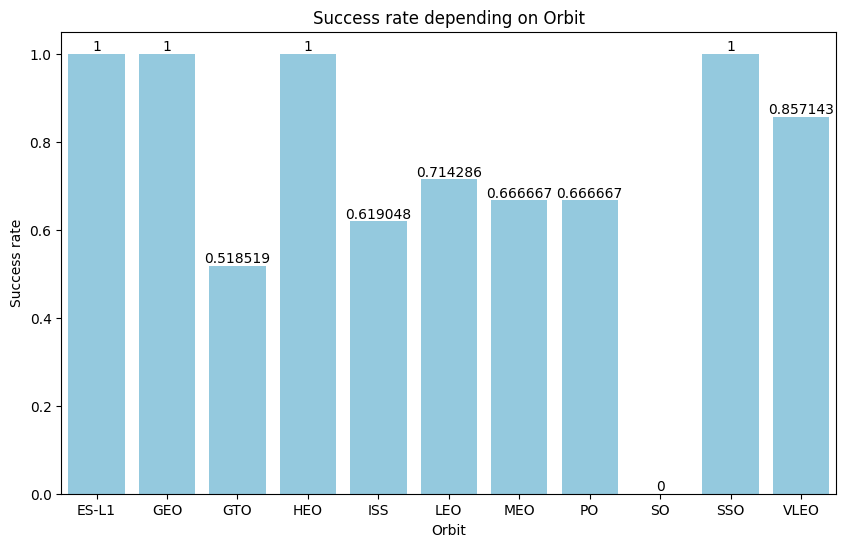

In [8]:
fig = plt.figure(figsize = (10,6))
ax = sns.barplot(data=barchart, x='Orbit', y='Class', color='skyblue')
ax.bar_label(ax.containers[0])
ax.set_title('Success rate depending on Orbit')
ax.set_ylabel('Success rate')
ax.set_xlabel('Orbit')

### TASK  4: Visualize the relationship between FlightNumber and Orbit type

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.

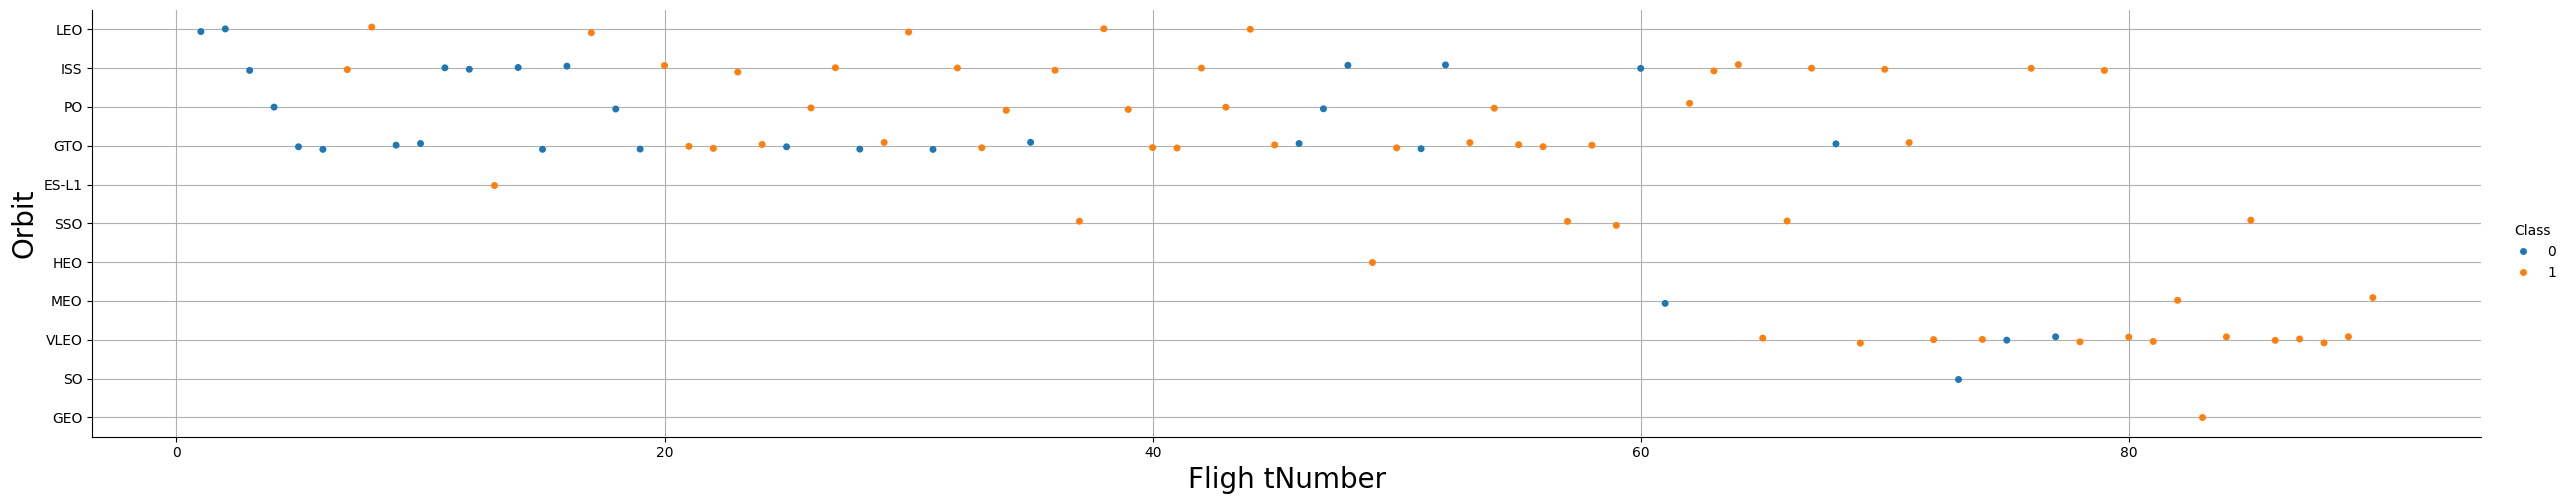

In [9]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Fligh tNumber",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.grid()
plt.show()

### TASK  5: Visualize the relationship between Payload Mass and Orbit type

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.

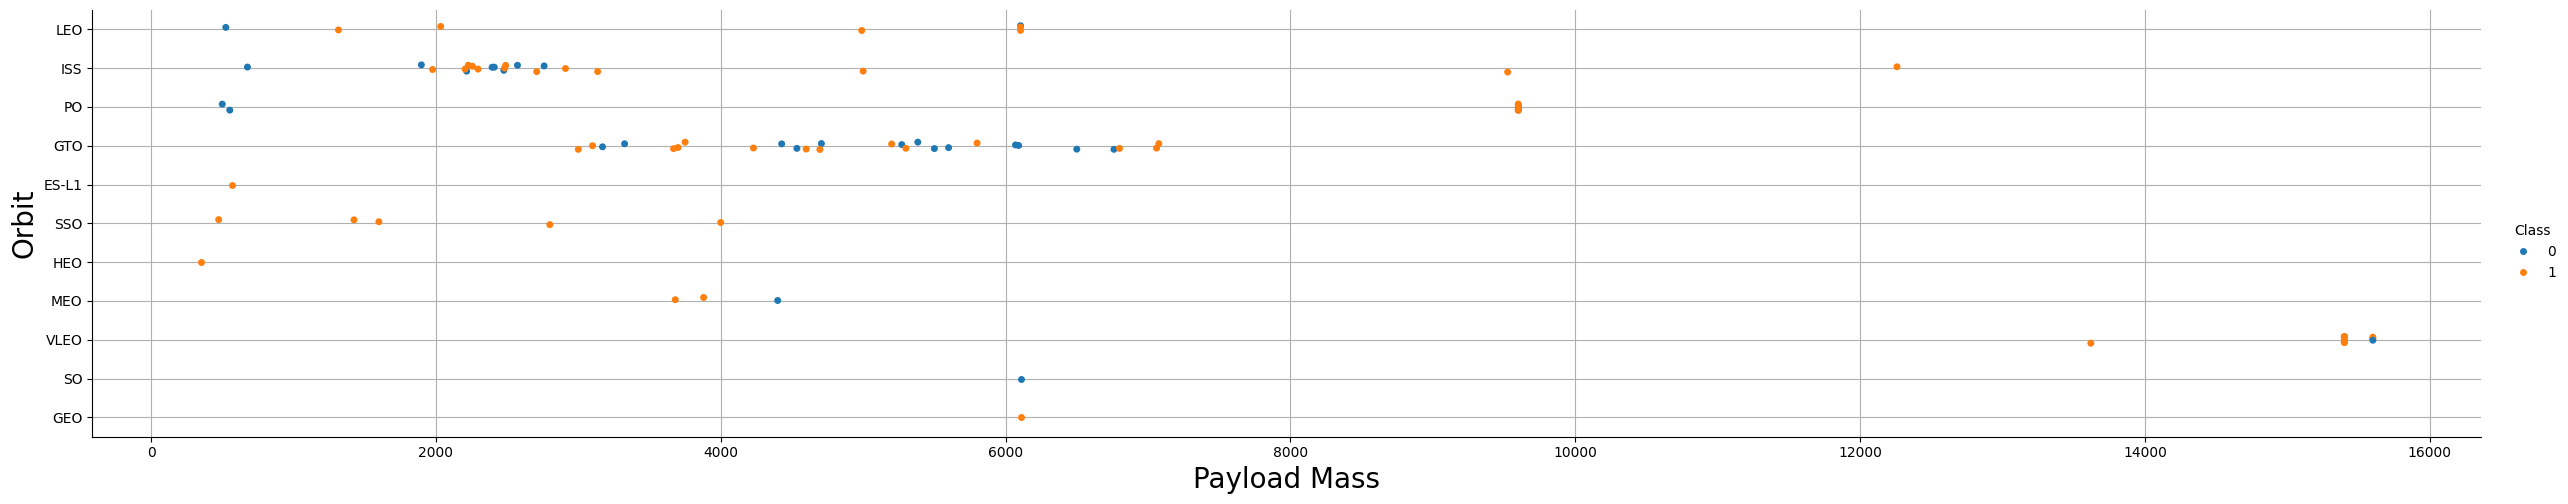

In [10]:
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Payload Mass",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.grid()
plt.show()

### TASK 6: Visualize the launch success yearly trend

You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.

In [11]:
import datetime
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df['Year'] = df['Date'].dt.year

In [13]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


In [14]:
success_trend  = df.groupby('Year')['Class'].mean().reset_index()
success_trend

,Year,Class
0,2010,0.000000
1,2012,0.000000
2,2013,0.000000
3,2014,0.333333
4,2015,0.333333
5,2016,0.625000
6,2017,0.833333
7,2018,0.611111
8,2019,0.900000
9,2020,0.842105


([<matplotlib.axis.XTick at 0x264e95c7d90>,
 [Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020')])

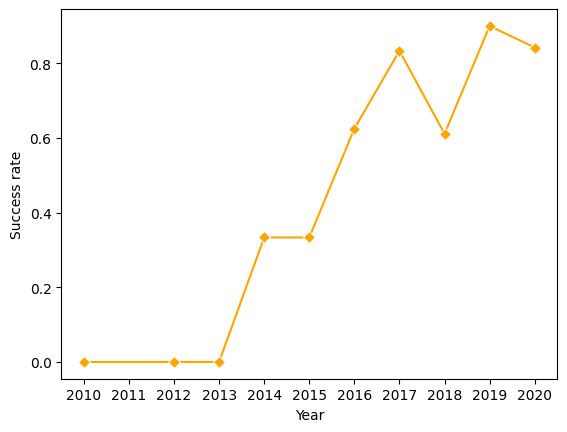

In [15]:
sns.lineplot(data=success_trend, x='Year', y='Class', color = 'orange', marker='D')
plt.ylabel('Success rate')
plt.xticks(range(2010, 2021))

## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

In [17]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns

Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [18]:
# HINT: Use get_dummies() function on the categorical columns
features_one_hot = pd.get_dummies(features[['Orbit', 'LaunchSite', 'LandingPad', 'Serial']])
features_F = pd.concat([features, features_one_hot], axis=1)

In [19]:
features_F.drop(columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'], inplace=True)

In [20]:
features_one_hot = features_F.astype('float32')

In [21]:
features_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 80 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         90 non-null     float32
 1   PayloadMass                          90 non-null     float32
 2   Flights                              90 non-null     float32
 3   GridFins                             90 non-null     float32
 4   Reused                               90 non-null     float32
 5   Legs                                 90 non-null     float32
 6   Block                                90 non-null     float32
 7   ReusedCount                          90 non-null     float32
 8   Orbit_ES-L1                          90 non-null     float32
 9   Orbit_GEO                            90 non-null     float32
 10  Orbit_GTO                            90 non-null     float32
 11  Orbit_HEO                         

In [120]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

In [121]:
features_one_hot.shape

(90, 80)